In [13]:
import csv
from collections import defaultdict

# Initialize lists to store column data
ages = []
sexes = []
bmis = []
children = []
smokers = []
regions = []
charges = []




In [14]:
# Path to the uploaded dataset
file_path = 'C:/Users/tatia/Desktop/python/python-portfolio-project-starter-files/insurance.csv' 

# Use DictReader to read the CSV file
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # Iterate through each row and store the data in the corresponding list
    for row in reader:
        ages.append(int(row['age']))
        sexes.append(row['sex'])
        bmis.append(float(row['bmi']))
        children.append(int(row['children']))
        smokers.append(row['smoker'])
        regions.append(row['region'])
        charges.append(float(row['charges']))
        
     # Optionally, store data by gender
        data_by_gender[row['sex']].append({
            'age': int(row['age']),
            'bmi': float(row['bmi']),
            'children': int(row['children']),
            'smoker': row['smoker'],
            'region': row['region'],
            'charges': float(row['charges'])
        })
        
# Print the first few entries to verify
print("Ages:", ages[:5])
print("Sexes:", sexes[:5])
print("BMIs:", bmis[:5])
print("Children:", children[:5])
print("Smokers:", smokers[:5])
print("Regions:", regions[:5])
print("Charges:", charges[:5])

# If using a dictionary to store data by gender
print("Data by Gender - Male:", data_by_gender['male'][:5])
print("Data by Gender - Female:", data_by_gender['female'][:5])
       


Ages: [19, 18, 28, 33, 32]
Sexes: ['female', 'male', 'male', 'male', 'male']
BMIs: [27.9, 33.77, 33.0, 22.705, 28.88]
Children: [0, 1, 3, 0, 0]
Smokers: ['yes', 'no', 'no', 'no', 'no']
Regions: ['southwest', 'southeast', 'southeast', 'northwest', 'northwest']
Charges: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]
Data by Gender - Male: [{'age': 18, 'bmi': 33.77, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 1725.5523}, {'age': 28, 'bmi': 33.0, 'children': 3, 'smoker': 'no', 'region': 'southeast', 'charges': 4449.462}, {'age': 33, 'bmi': 22.705, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 21984.47061}, {'age': 32, 'bmi': 28.88, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 3866.8552}, {'age': 37, 'bmi': 29.83, 'children': 2, 'smoker': 'no', 'region': 'northeast', 'charges': 6406.4107}]
Data by Gender - Female: [{'age': 19, 'bmi': 27.9, 'children': 0, 'smoker': 'yes', 'region': 'southwest', 'charges': 16884.924}, {'age

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average age
average_age = sum(ages) / len(ages)
average_age

print(f"The average age of the patients in the dataset is: {average_age:.2f} years")



The average age of the patients in the dataset is: 39.21 years


C:\Users\tatia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


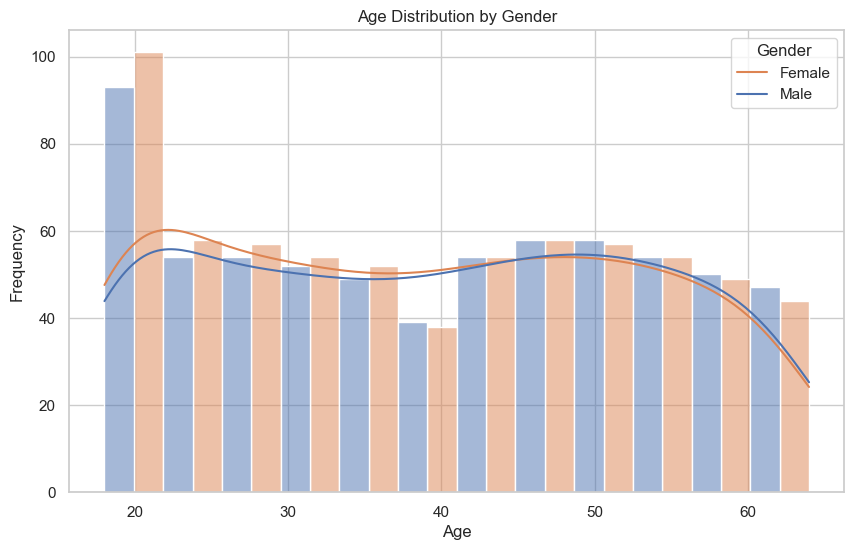

The age distribution shows a higher frequency of females than males in the 20-25 age range,
with the distribution balancing out in older age groups. Both genders exhibit a gradual
decline in frequency after age 60. The age and gender distribution bias, particularly the higher
frequency of younger females, could skew the analysis, potentially leading to overrepresentation
of this group in determining health insurance pricing. This imbalance might result in inaccurate
assessments of risk and unfair price discrimination against certain age or gender groups.


In [78]:
# Set up the visual theme
sns.set(style="whitegrid")


# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=sexes, x=ages, hue=sexes, multiple="dodge", kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

print("""The age distribution shows a higher frequency of females than males in the 20-25 age range,
with the distribution balancing out in older age groups. Both genders exhibit a gradual
decline in frequency after age 60. The age and gender distribution bias, particularly the higher
frequency of younger females, could skew the analysis, potentially leading to overrepresentation
of this group in determining health insurance pricing. This imbalance might result in inaccurate
assessments of risk and unfair price discrimination against certain age or gender groups.""")


In [83]:
# Filter for individuals with at least one child
ages_with_children = [ages[i] for i in range(len(children)) if children[i] > 0]

# Calculate the average age for those with at least one child
average_age_with_children = sum(ages_with_children) / len(ages_with_children)
average_age_with_children

print(f"The average age for someone who has at least one child in this dataset is: {average_age_with_children:.2f} years")


The average age for someone who has at least one child in this dataset is: 39.78 years


C:\Users\tatia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


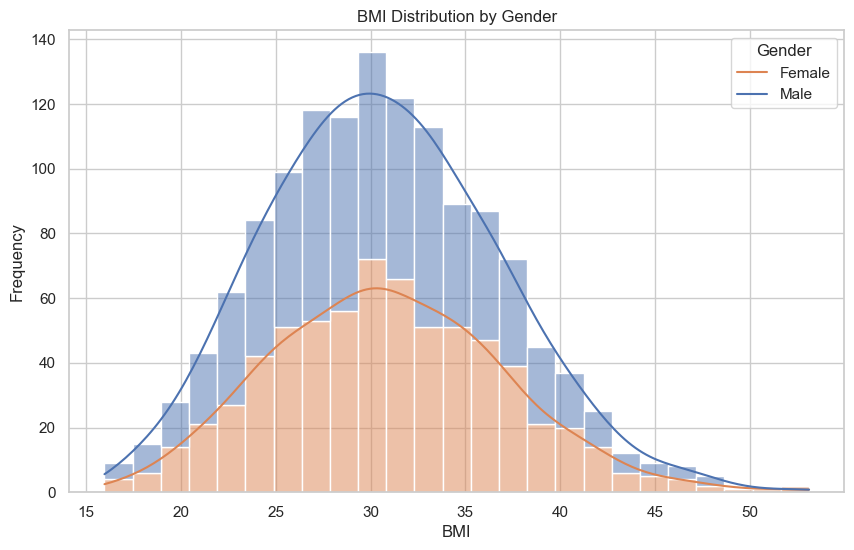

In [16]:
# BMI distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=sexes, x=bmis, hue=sexes, multiple="stack", kde=True)
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


The region with the majority of individuals is: southeast with 364 individuals


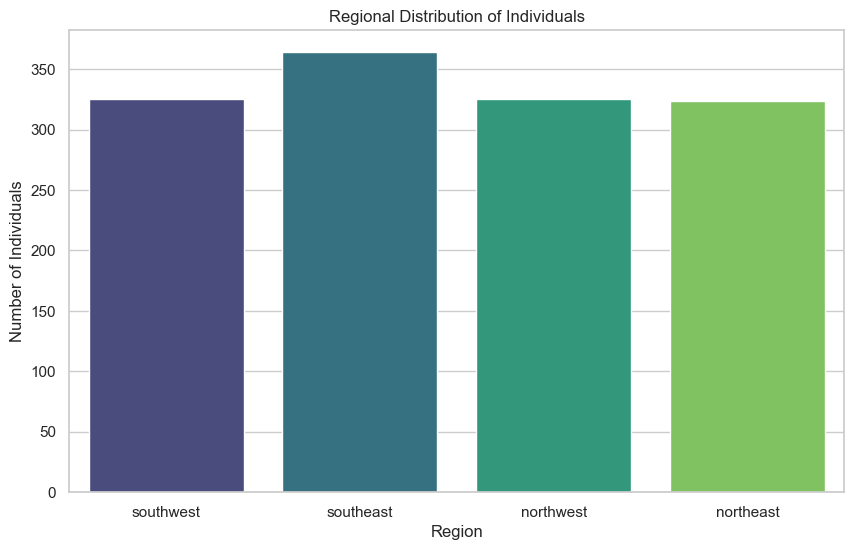

The region with the highest average insurance cost is: southeast


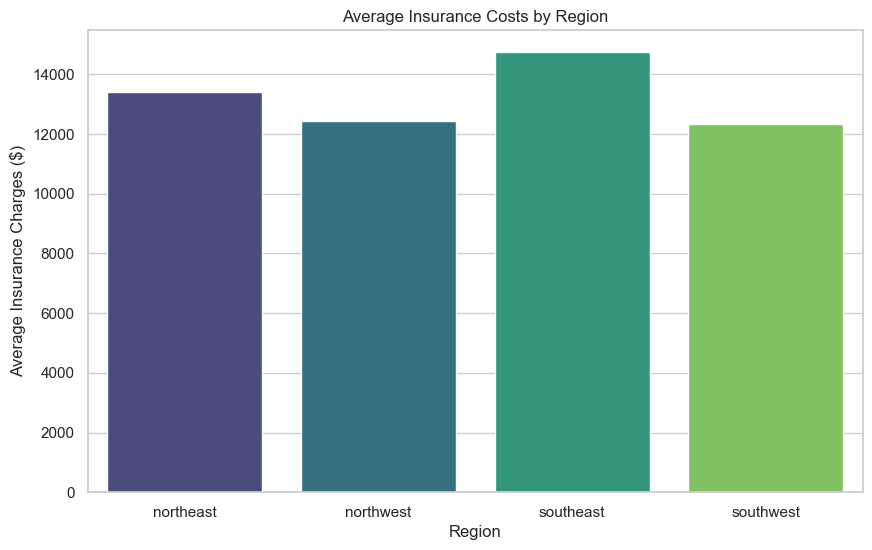

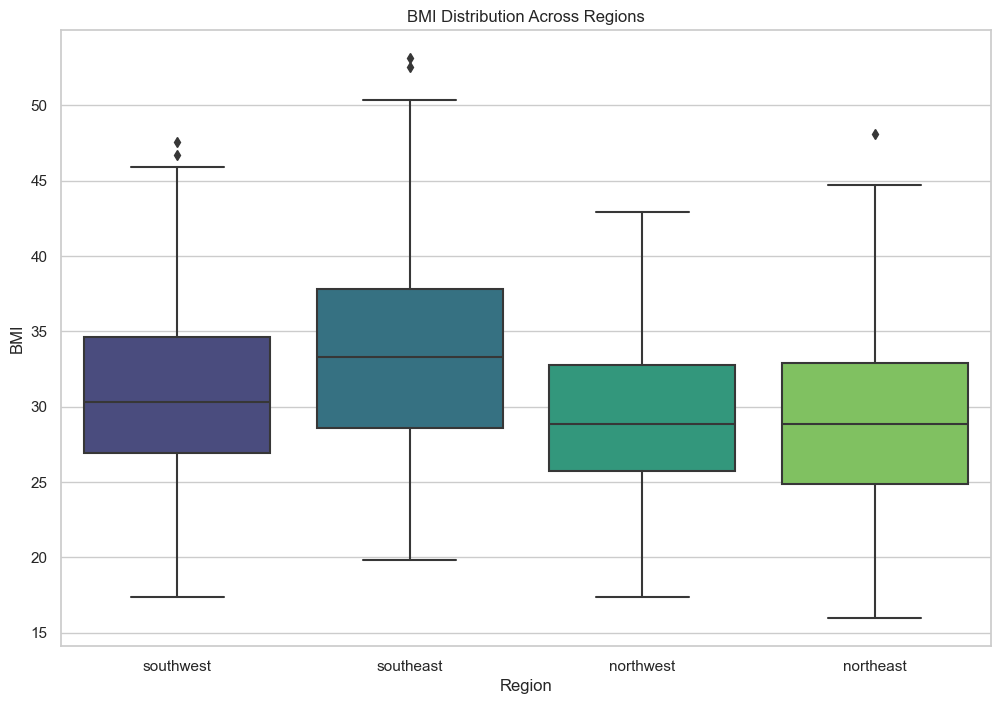

BMI is an important contributor to insurance costs. The region with the highest average BMI (Southeast) also charges the highest rate for health insurance.


In [75]:
# Analyze the majority region
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


region_counts = Counter(regions)
majority_region = region_counts.most_common(1)
majority_region
print(f"The region with the majority of individuals is: {majority_region[0][0]} with {majority_region[0][1]} individuals")

# Convert the counts to a DataFrame for easier plotting
region_df = pd.DataFrame(list(region_counts.items()), columns=['Region', 'Count'])

# Plot the regional distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', data=region_df, palette='viridis')
plt.title('Regional Distribution of Individuals')
plt.xlabel('Region')
plt.ylabel('Number of Individuals')
plt.show()

# Create a DataFrame for easier analysis
data_df = pd.DataFrame({
    'age': ages,
    'sex': sexes,
    'bmi': bmis,
    'children': children,
    'smoker': smokers,
    'region': regions,
    'charges': charges
})

# Group by region and calculate the average insurance cost
average_costs_by_region = data_df.groupby('region')['charges'].mean().reset_index()
average_costs_by_region

# Find the region with the highest average cost
region_with_highest_cost = average_costs_by_region.loc[average_costs_by_region['charges'].idxmax(), 'region']

# Display the result
print("The region with the highest average insurance cost is:", region_with_highest_cost)


# Plot the average insurance costs by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=average_costs_by_region, palette='viridis')
plt.title('Average Insurance Costs by Region')
plt.xlabel('Region')
plt.ylabel('Average Insurance Charges ($)')
plt.show()

#Plot BMI distribution by the region
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='bmi', data=data_df, palette='viridis')
plt.title('BMI Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()

print('BMI is an important contributor to insurance costs. The region with the highest average BMI (Southeast) '
      'also charges the highest rate for health insurance.')


The average insurance cost for non-smokers is: $8434.27
The average insurance cost for smokers is: $32050.23
The average insurance cost for a female smoker is: $30679.00
The average insurance cost for a male smoker is: $33042.01


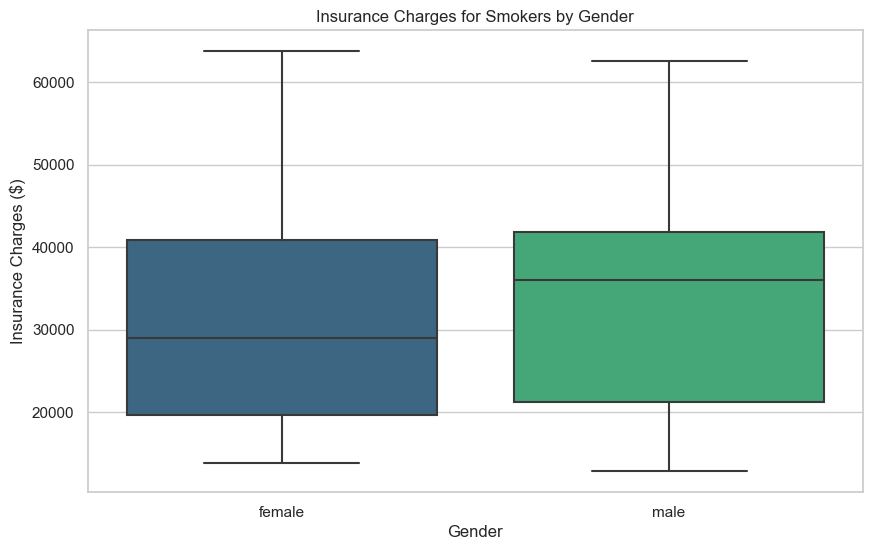

Insurance Costs: Smoking substantially increases insurance premiums for both genders, 
but the difference between genders is more nuanced.


In [82]:
# Separate charges for smokers and non-smokers
smoker_charges = [charges[i] for i in range(len(smokers)) if smokers[i] == 'yes']
non_smoker_charges = [charges[i] for i in range(len(smokers)) if smokers[i] == 'no']

# Calculate the average charges
average_smoker_charges = sum(smoker_charges) / len(smoker_charges)
average_non_smoker_charges = sum(non_smoker_charges) / len(non_smoker_charges)

average_smoker_charges, average_non_smoker_charges

print(f"The average insurance cost for non-smokers is: ${average_non_smoker_charges:.2f}")
print(f"The average insurance cost for smokers is: ${average_smoker_charges:.2f}")


# Separate charges for male and female smokers
male_smoker_charges = [charges[i] for i in range(len(smokers)) if smokers[i] == 'yes' and sexes[i] == 'male']
female_smoker_charges = [charges[i] for i in range(len(smokers)) if smokers[i] == 'yes' and sexes[i] == 'female']

# Calculate the average charges
average_male_smoker_charges = sum(male_smoker_charges) / len(male_smoker_charges)
average_female_smoker_charges = sum(female_smoker_charges) / len(female_smoker_charges)

average_male_smoker_charges, average_female_smoker_charges

print(f"The average insurance cost for a female smoker is: ${average_female_smoker_charges:.2f}")
print(f"The average insurance cost for a male smoker is: ${average_male_smoker_charges:.2f}")

# Filter the data for smokers
smoker_df = data_df[data_df['smoker'] == 'yes']

# Plot the distribution of insurance charges by gender for smokers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=smoker_df, palette='viridis')
plt.title('Insurance Charges for Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Insurance Charges ($)')
plt.show()


print("""Insurance Costs: Smoking substantially increases insurance premiums for both genders, 
but the difference between genders is more nuanced.""")


In [79]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(male_smoker_charges, female_smoker_charges)

t_stat, p_value


(1.6780825715285819, 0.09447953030991117)

In [84]:

import statsmodels.api as sm

# Convert categorical columns to category type and then to numerical codes
data_df['sex_code'] = data_df['sex'].astype('category').cat.codes
data_df['region_code'] = data_df['region'].astype('category').cat.codes

# Verify the new columns are added correctly
data_df.head()



,age,sex,bmi,children,smoker,region,charges,sex_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,3
1,18,male,33.770,1,no,southeast,1725.55230,1,2
2,28,male,33.000,3,no,southeast,4449.46200,1,2
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1


In [90]:
import statsmodels.api as sm

# Create the interaction term: children * smoker
# Convert smoker status to a binary variable: 1 for 'yes', 0 for 'no'
data_df['smoker_binary'] = data_df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data_df['sex_smoker_interaction'] = data_df['sex_code'] * data_df['smoker_binary']

# Define the independent variables, including the interaction term
X = data_df[['sex_code', 'age', 'bmi', 'children', 'region_code', 'smoker_binary', 'sex_smoker_interaction']]

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Dependent variable
y = data_df['charges']

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the summary
model_summary = model.summary()
print(model_summary)

print("""Smoking increases insurance charges by about $22,500. Age, BMI, and number of children also 
significantly raise costs. The interaction between smoking and having children further increases charges. 
Gender has no significant effect, while certain regions are associated with slightly lower costs.""")

print("""The higher impact of smoking on insurance costs for this gender could be due to gender-specific 
health risks associated with smoking. For instance, men might be at higher risk for certain smoking-related 
diseases, or there could be behavioral factors where smoking exacerbates health risks differently based on 
gender. This leads to insurers charging higher premiums for smokers of that gender.""")




                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     576.9
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:06:47   Log-Likelihood:                -13544.
No. Observations:                1338   AIC:                         2.710e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.14

Average insurance cost for a smoking mother is: $30673.81
Average insurance cost for a smoking father is: $33770.42
Average insurance cost for a NON-SMOKING mother is: $9577.28
Average insurance cost for a NON-SMOKING father is: $8509.23


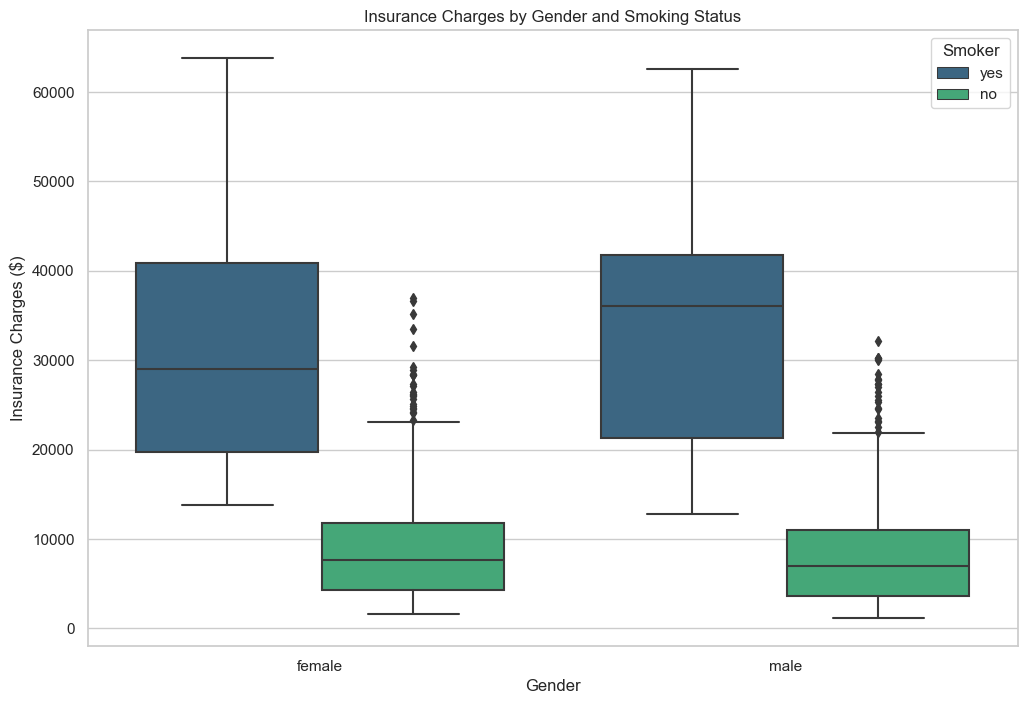

Gender Effect: While fathers generally  have higher insurance costs, this is more 
pronounced among smokers. Among non-smokers, the  difference is minor, with mothers actually 
having slightly higher costs, which could be due  to differing healthcare needs or risk assessments 
between genders.


In [81]:
# Filter for smoking women with at least one child
smoking_women_with_children = data_df[(data_df['sex'] == 'female') & (data_df['smoker'] == 'yes') & (data_df['children'] > 0)]

# Filter for smoking men with at least one child (for comparison)
smoking_men_with_children = data_df[(data_df['sex'] == 'male') & (data_df['smoker'] == 'yes') & (data_df['children'] > 0)]

# Filter for non-smoking women with at least one child (for further comparison)
non_smoking_women_with_children = data_df[(data_df['sex'] == 'female') & (data_df['smoker'] == 'no') & (data_df['children'] > 0)]

# Filter for non-smoking women with at least one child (for further comparison)
non_smoking_men_with_children = data_df[(data_df['sex'] == 'male') & (data_df['smoker'] == 'no') & (data_df['children'] > 0)]


# Calculate average insurance costs
avg_cost_smoking_women_with_children = smoking_women_with_children['charges'].mean()
avg_cost_smoking_men_with_children = smoking_men_with_children['charges'].mean()
avg_cost_non_smoking_women_with_children = non_smoking_women_with_children['charges'].mean()
avg_non_smoking_men_with_children = non_smoking_men_with_children['charges'].mean()

print(f"Average insurance cost for a smoking mother is: ${avg_cost_smoking_women_with_children:.2f}")
print(f"Average insurance cost for a smoking father is: ${avg_cost_smoking_men_with_children:.2f}")
print(f"Average insurance cost for a NON-SMOKING mother is: ${avg_cost_non_smoking_women_with_children:.2f}")
print(f"Average insurance cost for a NON-SMOKING father is: ${avg_non_smoking_men_with_children:.2f}")

#Smoking women tend to have lower average insurance costs compared to smoking men. 



# Boxplot of insurance charges by gender and smoking status
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='charges', hue='smoker', data=data_df, palette='viridis')
plt.title('Insurance Charges by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Insurance Charges ($)')
plt.legend(title='Smoker')
plt.show()

print("""Gender Effect: While fathers generally  have higher insurance costs, this is more 
pronounced among smokers. Among non-smokers, the  difference is minor, with mothers actually 
having slightly higher costs, which could be due  to differing healthcare needs or risk assessments 
between genders.""")



In [41]:
from scipy.stats import ttest_ind

# T-test between smoking women with children and smoking men with children
t_stat1, p_value1 = ttest_ind(smoking_women_with_children['charges'], smoking_men_with_children['charges'])

t_stat1, p_value1




(-1.6637089362374144,
 0.09816538953408832,
 20.292633613885776,
 4.008337284718429e-62)

In [93]:
comparison_df = data_df[data_df['smoker'] == 'yes']

# Add a constant to the model (for the intercept)
X = comparison_df[['sex_code', 'age', 'bmi', 'children', 'region_code']]
X = sm.add_constant(X)

# Dependent variable
y = comparison_df['charges']

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the summary
model_summary = model.summary()
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.36e-79
Time:                        18:09:11   Log-Likelihood:                -2758.7
No. Observations:                 274   AIC:                             5529.
Df Residuals:                     268   BIC:                             5551.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.233e+04   1971.010    -11.331      